<a href="https://colab.research.google.com/github/zameel7/bulk-certificate/blob/main/AutoCertificate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google drive with Colab
from google.colab import drive
drive.mount('/content/gfiles')

Mounted at /content/gfiles


In [ ]:
# import the necessary libraries</pre>
import cv2 as cv
import pandas as pd
from google.colab import files
import os

In [ ]:
# Upload excel file
print("Upload the excel sheet with the required names:")
nameFile = files.upload()

# Get the name of the file uploaded
nameFile = [i for i in nameFile][0]

# Set up the dataframe
df = pd.read_excel(nameFile)
print(df)
colName = input("Enter the name of the column with names (Find it in the list above): ")
df = df[colName]
count = len(df)

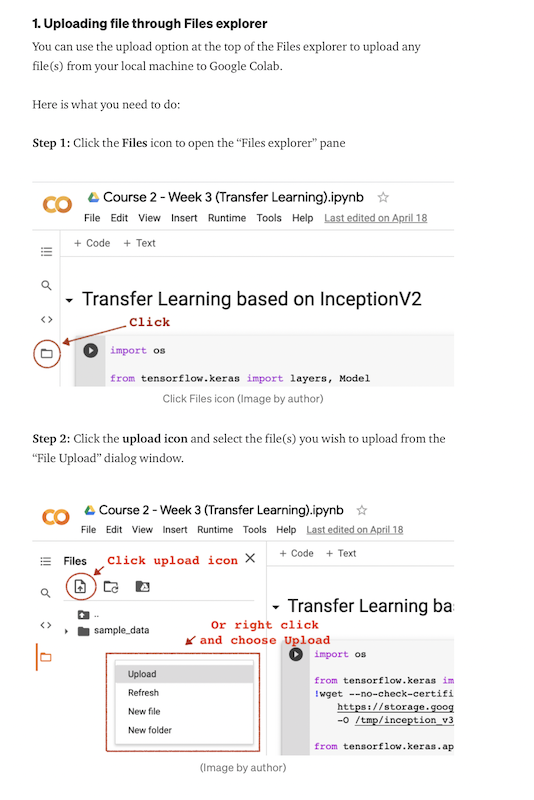

<ol>
  <li><h3>Upload the template of the certificate as the method shown above (Use png files)</h3></li>
  <li><h3>Rename the template to something simple</h3></li>
  <li><h3>Enter the name of the file without '.png' in the next block</li>
</ol>

In [ ]:
# Upload the template of the certificate
template = input("Enter the name of the template file (without '.png'): ") + '.png'

# Output Paths
folder = input("Enter folder name: ")
output_path = f'/content/gfiles/MyDrive/{folder}'
os.mkdir(output_path)

<h3>Find coordinates on the certificate where the name will be printing (set according to your own template)</h3>
<h4>You may use this site to find the coordinates: <a style="text-decoration:none; color:black;" href="https://yangcha.github.io/iview/iview.html"><button>Go to website</a></button></h4>

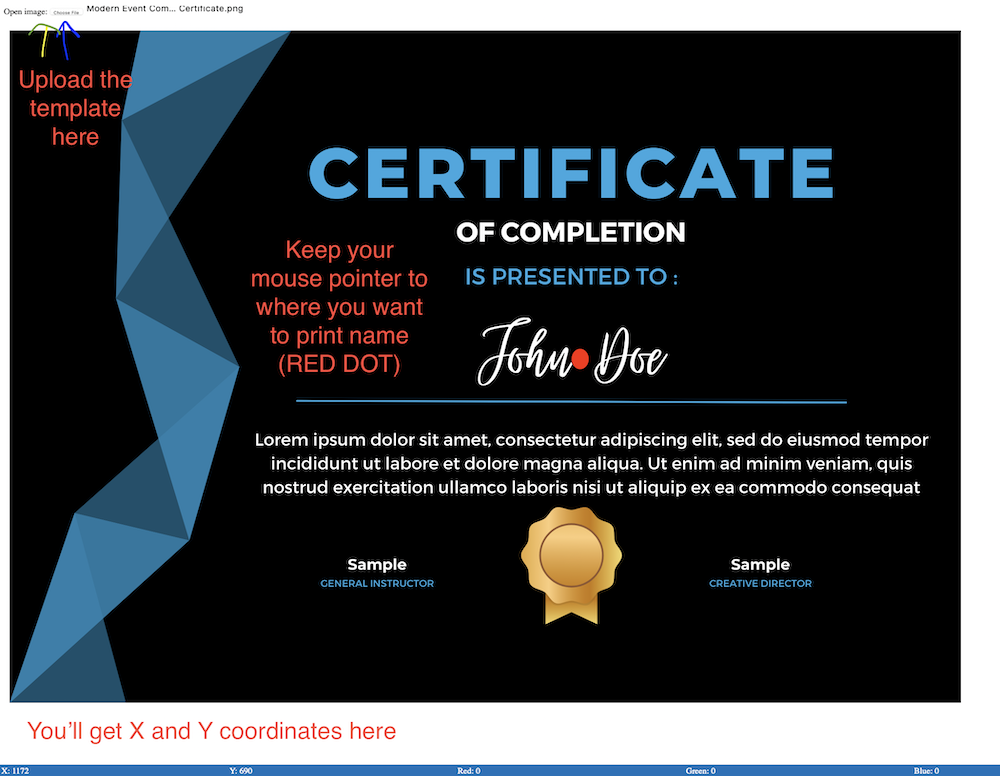

In [ ]:
x = int(input("X: "))
y = int(input("Y: "))

# Setting the font size and font
# colour
font_size = 2
print("Enter the font color(rgb):")
r = int(input("r:"))
g = int(input("g:"))
b = int(input("b:"))
font_color = (r,g,b)

# printing for all the names in the
# excel sheet
try:
  for i in range(count):
    # grabs the row=i and column=1 cell
    # that contains the name value of that
    # cell is stored in the variable certi_name
    try: 
      certi_name =  df[i].upper()
    except AttributeError:
      certi_name = df[i+1].upper()
    print(certi_name + "'s certificate saved successfully")

    # choose the font from opencv
    font = cv.FONT_HERSHEY_COMPLEX

    # image template
    img = cv.imread(template)


    # get the size of the name to be
    # printed
    text_size = cv.getTextSize(certi_name, font, font_size, 10)[0]	

    # get the (x,y) coordinates where the
    # name is to written on the template
    # The function cv.putText accepts only
    # integer arguments so convert it into 'int'.
    text_x = int(x - text_size[0]/2)
    
    cv.putText(img, certi_name,
        (text_x, y),
        font,
        font_size,
        font_color,2)
    
    # Output path along with the name of the
    # certificate generated
    certi_path = f'{output_path}/{certi_name}.png'
    

    # Save the certificate					
    cv.imwrite(certi_path,img)
    print(text_x, y)
except:
  print("An error occured. Please report with the screenshot to zameelhassan2024@cs.ajce.in")
  
